In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart.csv")

## Understanding the structure of the Heart dataset

In [3]:
data.head(5)
data.tail(5)
data.shape
data.info()
data.shape
data.isnull().sum()
#data_dup = data.duplicated().any()
#print(data_dup)
#data = data.drop_duplicates()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(1025, 14)

### Discussiones:**
   - The DataFrame has 14 columns, each associated with a data type:
     - **int64:** Integer data type (e.g., `age`, `sex`, `cp`).
     - **float64:** Floating-point data type (e.g., `oldpeak`).
   - The breakdown indicates which variables are numerical and whether they are integers or l Counts:**
   - All columns have 1,025 non-null valuthe dataset has no missing values lumns Overview:**
   - The column names (e.g., `age`, `sex`, `chol`, `target`) suggest this dataset contains information related to health and heart disease,he `target` likely indicating the presence or absence predictive modeling.

<Axes: >

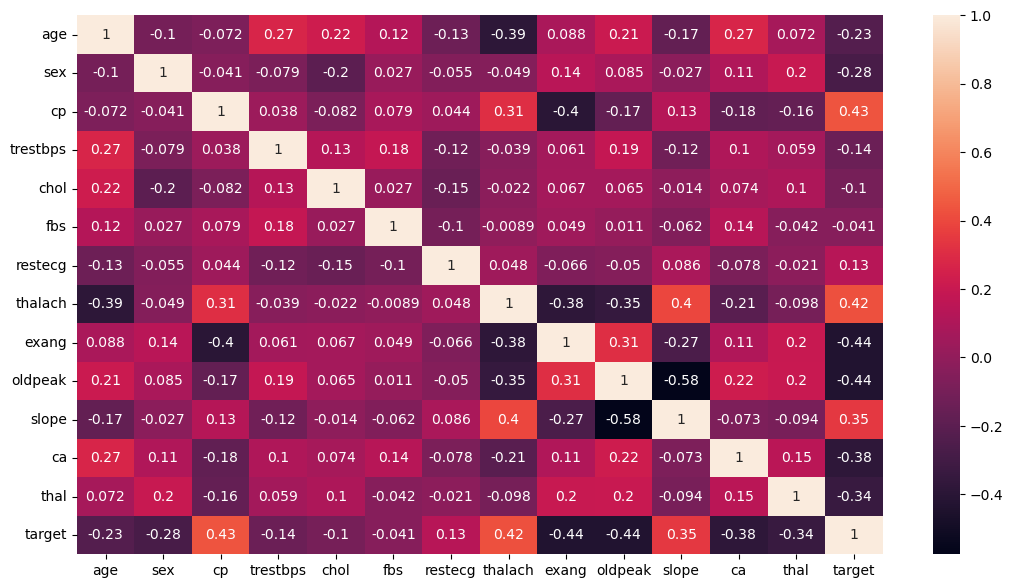

In [4]:
# to check correlation between different features available in our dataset

plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), annot=True)

# data.corr()
# sns.heatmap()
# plt.figure(figsize=(1y7,6))
# annot=True - parameter of this heatmap method of seaborn

## Frequency Of Heart Disease Cases

Dataset Columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Value Counts for Target Column:
1    526
0    499
Name: target, dtype: int64


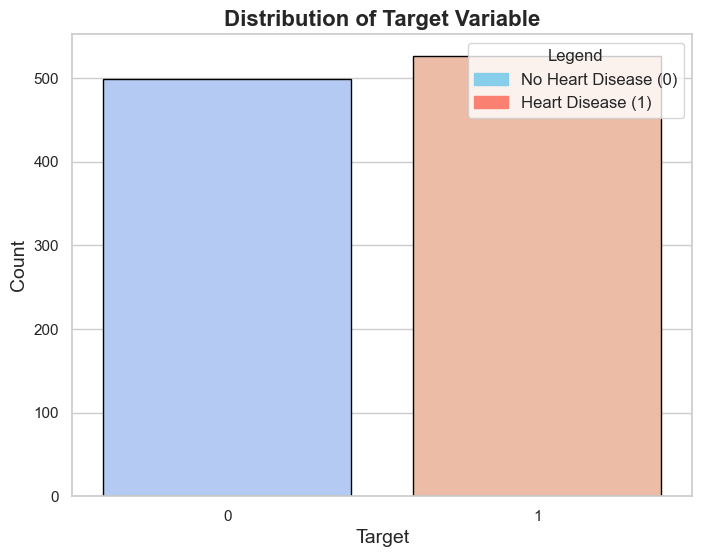

In [5]:
# Display the columns in the dataset
print("Dataset Columns:")
print(data.columns)

# Display the value counts of the target column with improved output formatting
print("\nValue Counts for Target Column:")
print(data['target'].value_counts())

# Import libraries for enhanced visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set a style for the visualization
sns.set(style="whitegrid", palette="pastel")

# Create a count plot for the target column
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
sns.countplot(x=data['target'], 
              palette="coolwarm",  # Change color palette
              edgecolor="black")   # Add edge color for bars

# Add labels and a title
plt.title("Distribution of Target Variable", fontsize=16, fontweight='bold')
plt.xlabel("Target", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add a custom legend
legend_labels = [Patch(color="skyblue", label="No Heart Disease (0)"), 
                 Patch(color="salmon", label="Heart Disease (1)")]
plt.legend(handles=legend_labels, title="Legend", loc="upper right", fontsize=12)

# Display the plot
plt.show()


## Gender Distribution For Heart Disease Cases

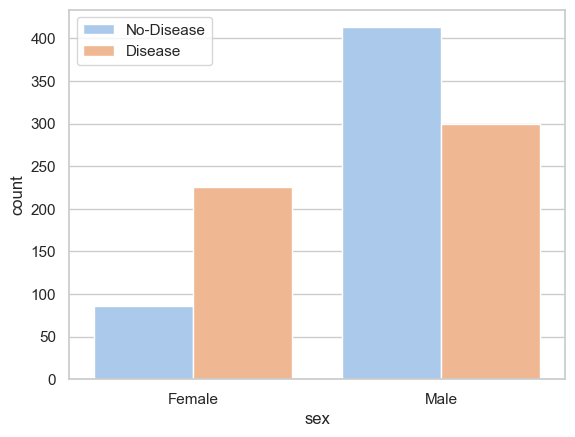

In [6]:
data.columns
# use "countplot" for distribution

sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## Age Distribution For Heart Disease Cases

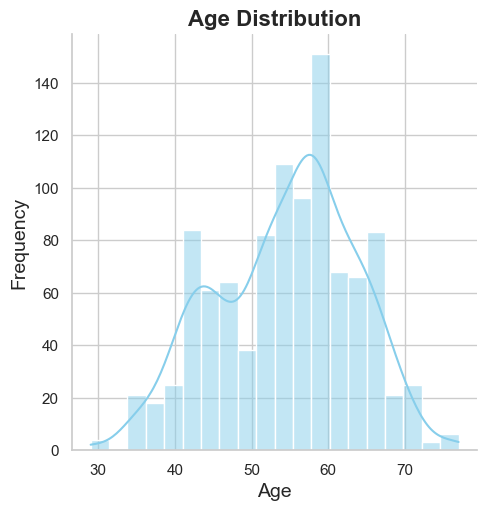

In [7]:
# Create a histogram with a density curve
sns.displot(data['age'], bins=20, kde=True, color="skyblue")

# Add labels and title for better aesthetics
plt.title("Age Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

## Prevalence of Different Chest Pain Types

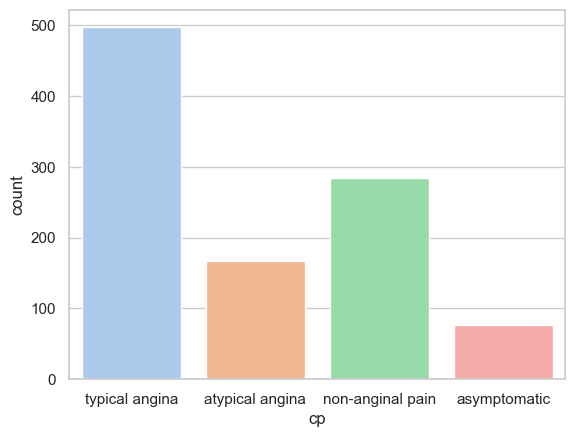

In [8]:
sns.countplot(x= data['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=0)
plt.show()

## Chest Pain Distribution Per Heart Disease Cases

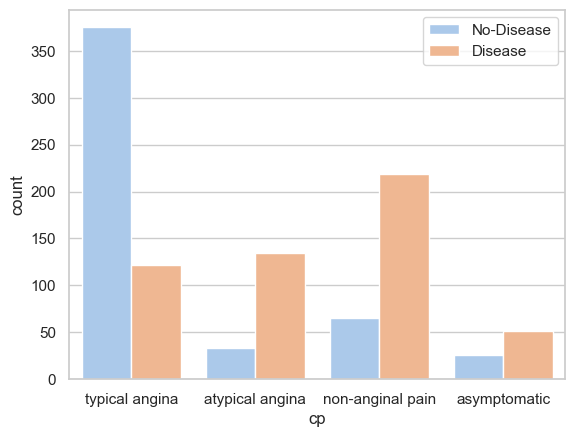

In [9]:
data.columns
sns.countplot(x='cp',hue='target', data=data)
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.legend(labels=["No-Disease","Disease"])
plt.show()

## Fasting Blood Sugar Distribution Per Target Variable

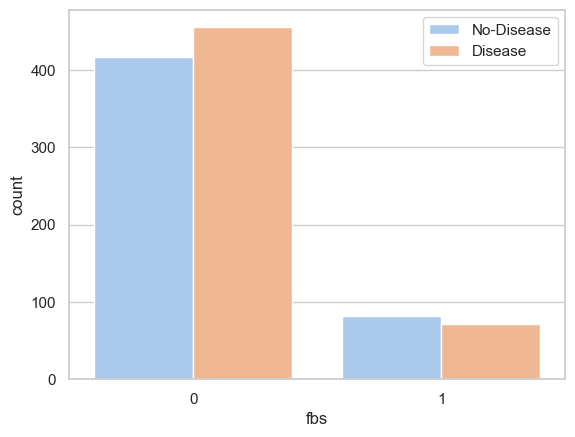

In [10]:
data.columns
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

# fbs is a diabetic indicator
# fbs greater than 120 are diabetics
# higher number of diabetics patient without heart disease

## Distribution of Serum Cholesterol

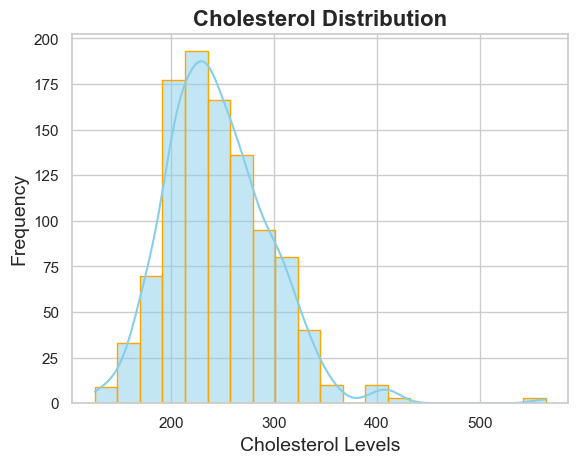

In [11]:
# Plot the histogram with a density curve
sns.histplot(data['chol'], kde=True, bins=20, color="skyblue", edgecolor="orange")

# Add labels and title for better visualization
plt.title("Cholesterol Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Cholesterol Levels", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

In [12]:
# Example: Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

